In [95]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost
from sklearn.preprocessing import LabelEncoder

In [80]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (3).csv


In [81]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [82]:
display(data.isnull().any()) #to check for any null values

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

No null values


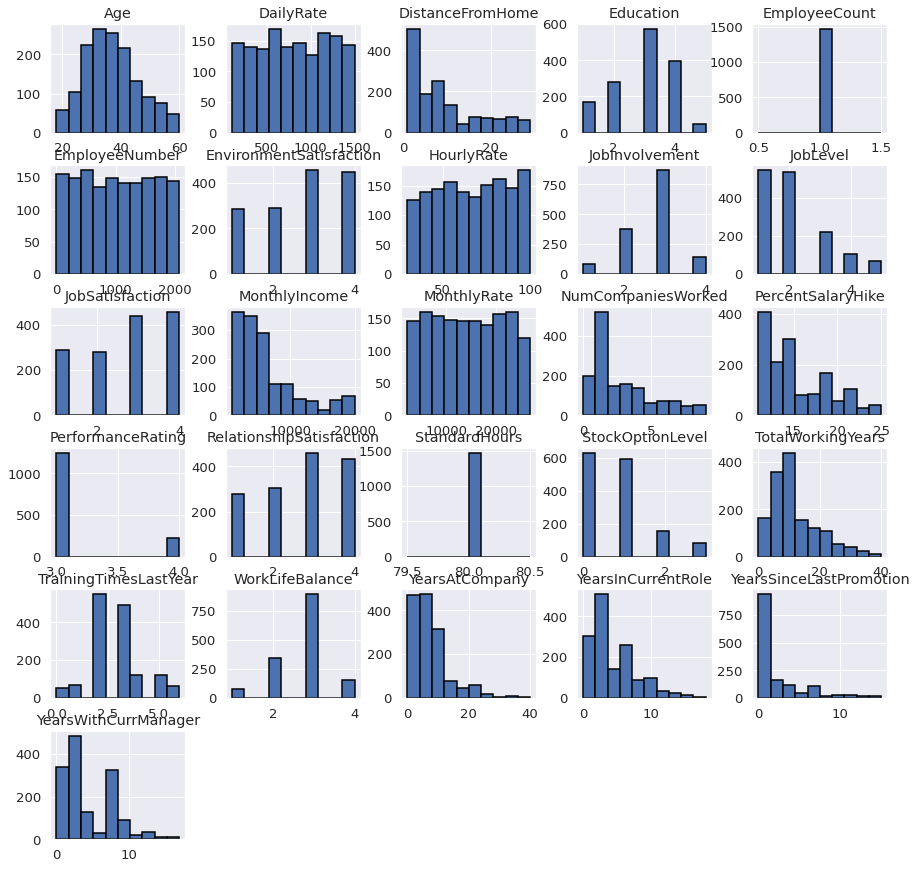

In [83]:
data.hist(edgecolor='black', linewidth=1.5, figsize=(15,15));

In [0]:
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)
#EmployeeNumber is just for identification,so we can remove it.Rest columns which are removed do not change much as the value range changes.Hencd they can also be changed.Basically they hav a standard deviation of nearby zero.

Counter({'No': 1233, 'Yes': 237})


Text(0.5, 1.0, 'Division of Attrition')

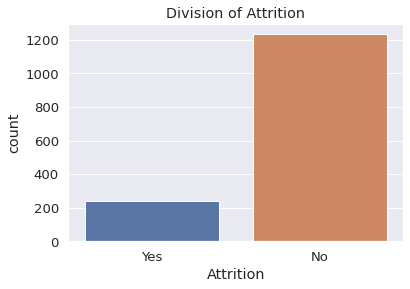

In [85]:
from collections import Counter
print(Counter(data['Attrition']))
sns.countplot(x='Attrition', data=data)
plt.title("Division of Attrition")

Attrition is basically our label

In [86]:
categorical_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


In [0]:
data['Attrition'] = data.Attrition.astype("category").cat.codes

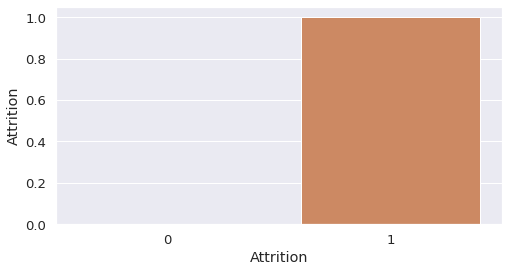

In [88]:
graph = plt.figure(figsize = (8,4))
sns.barplot(x = 'Attrition', y = 'Attrition', data =data )

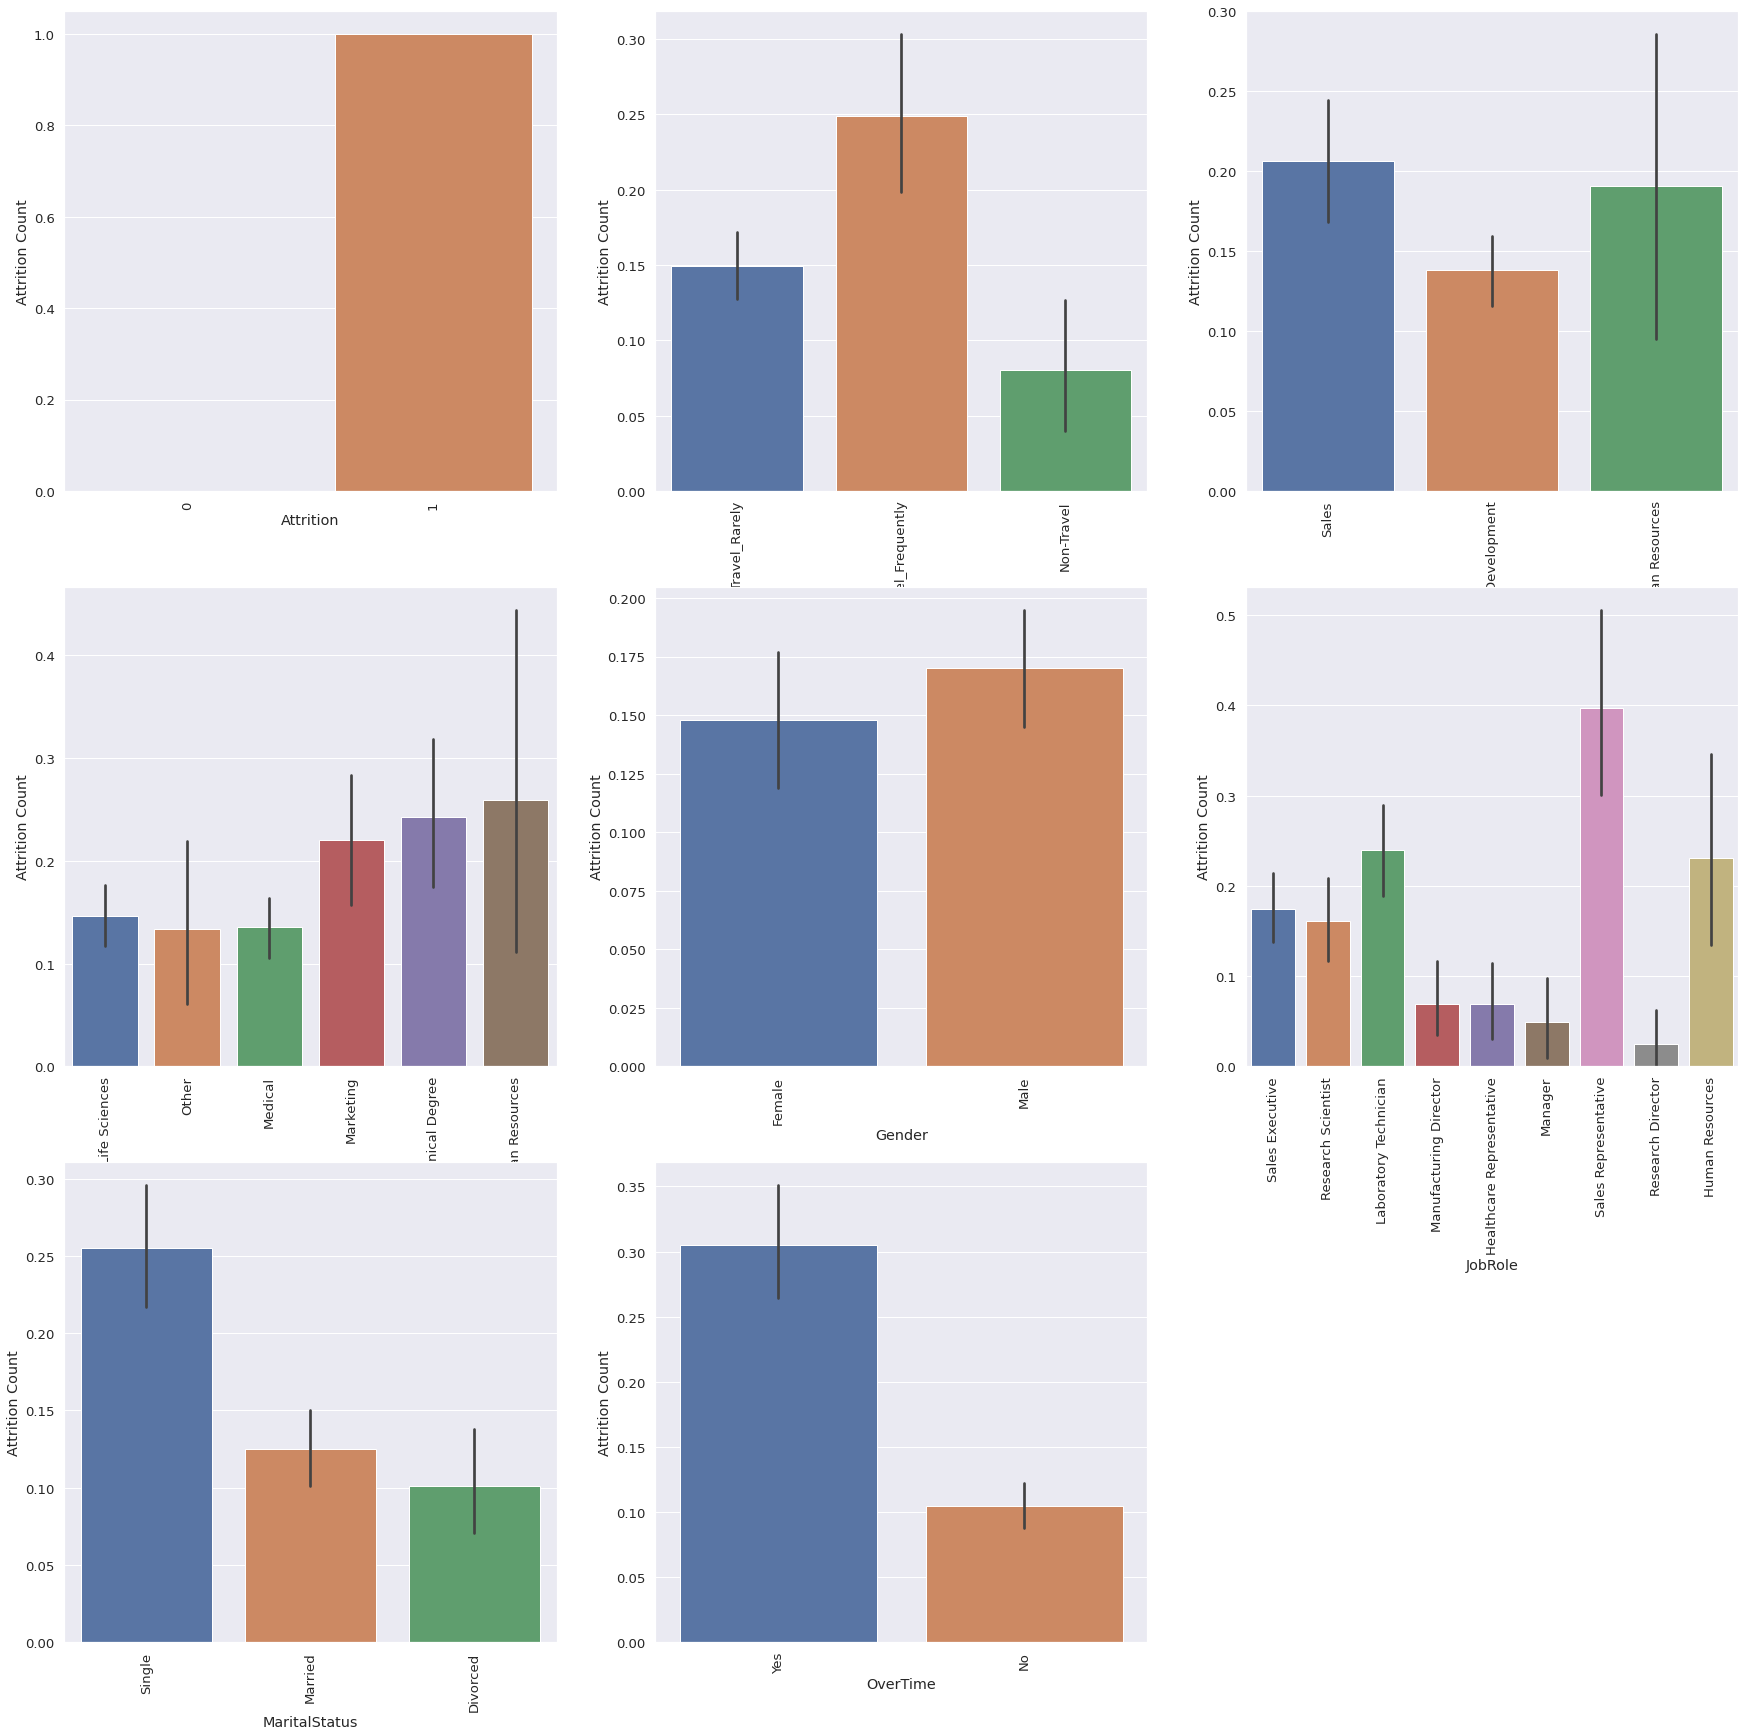

In [89]:
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=data)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')
  


It is conclusive that the person who travels more is more likely ti quit the job.
Person who has a job in Research and development is less likely to quit than others.
Employee having gender as male are more likely to quit the job.
The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.
Single people are more likely to quit than married or divorced.
Employee with more working hours is more likely to quit.

In [90]:
corr_matrix = data.corr()
print(corr_matrix["Attrition"].sort_values(ascending=False))

Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition, dtype: float64


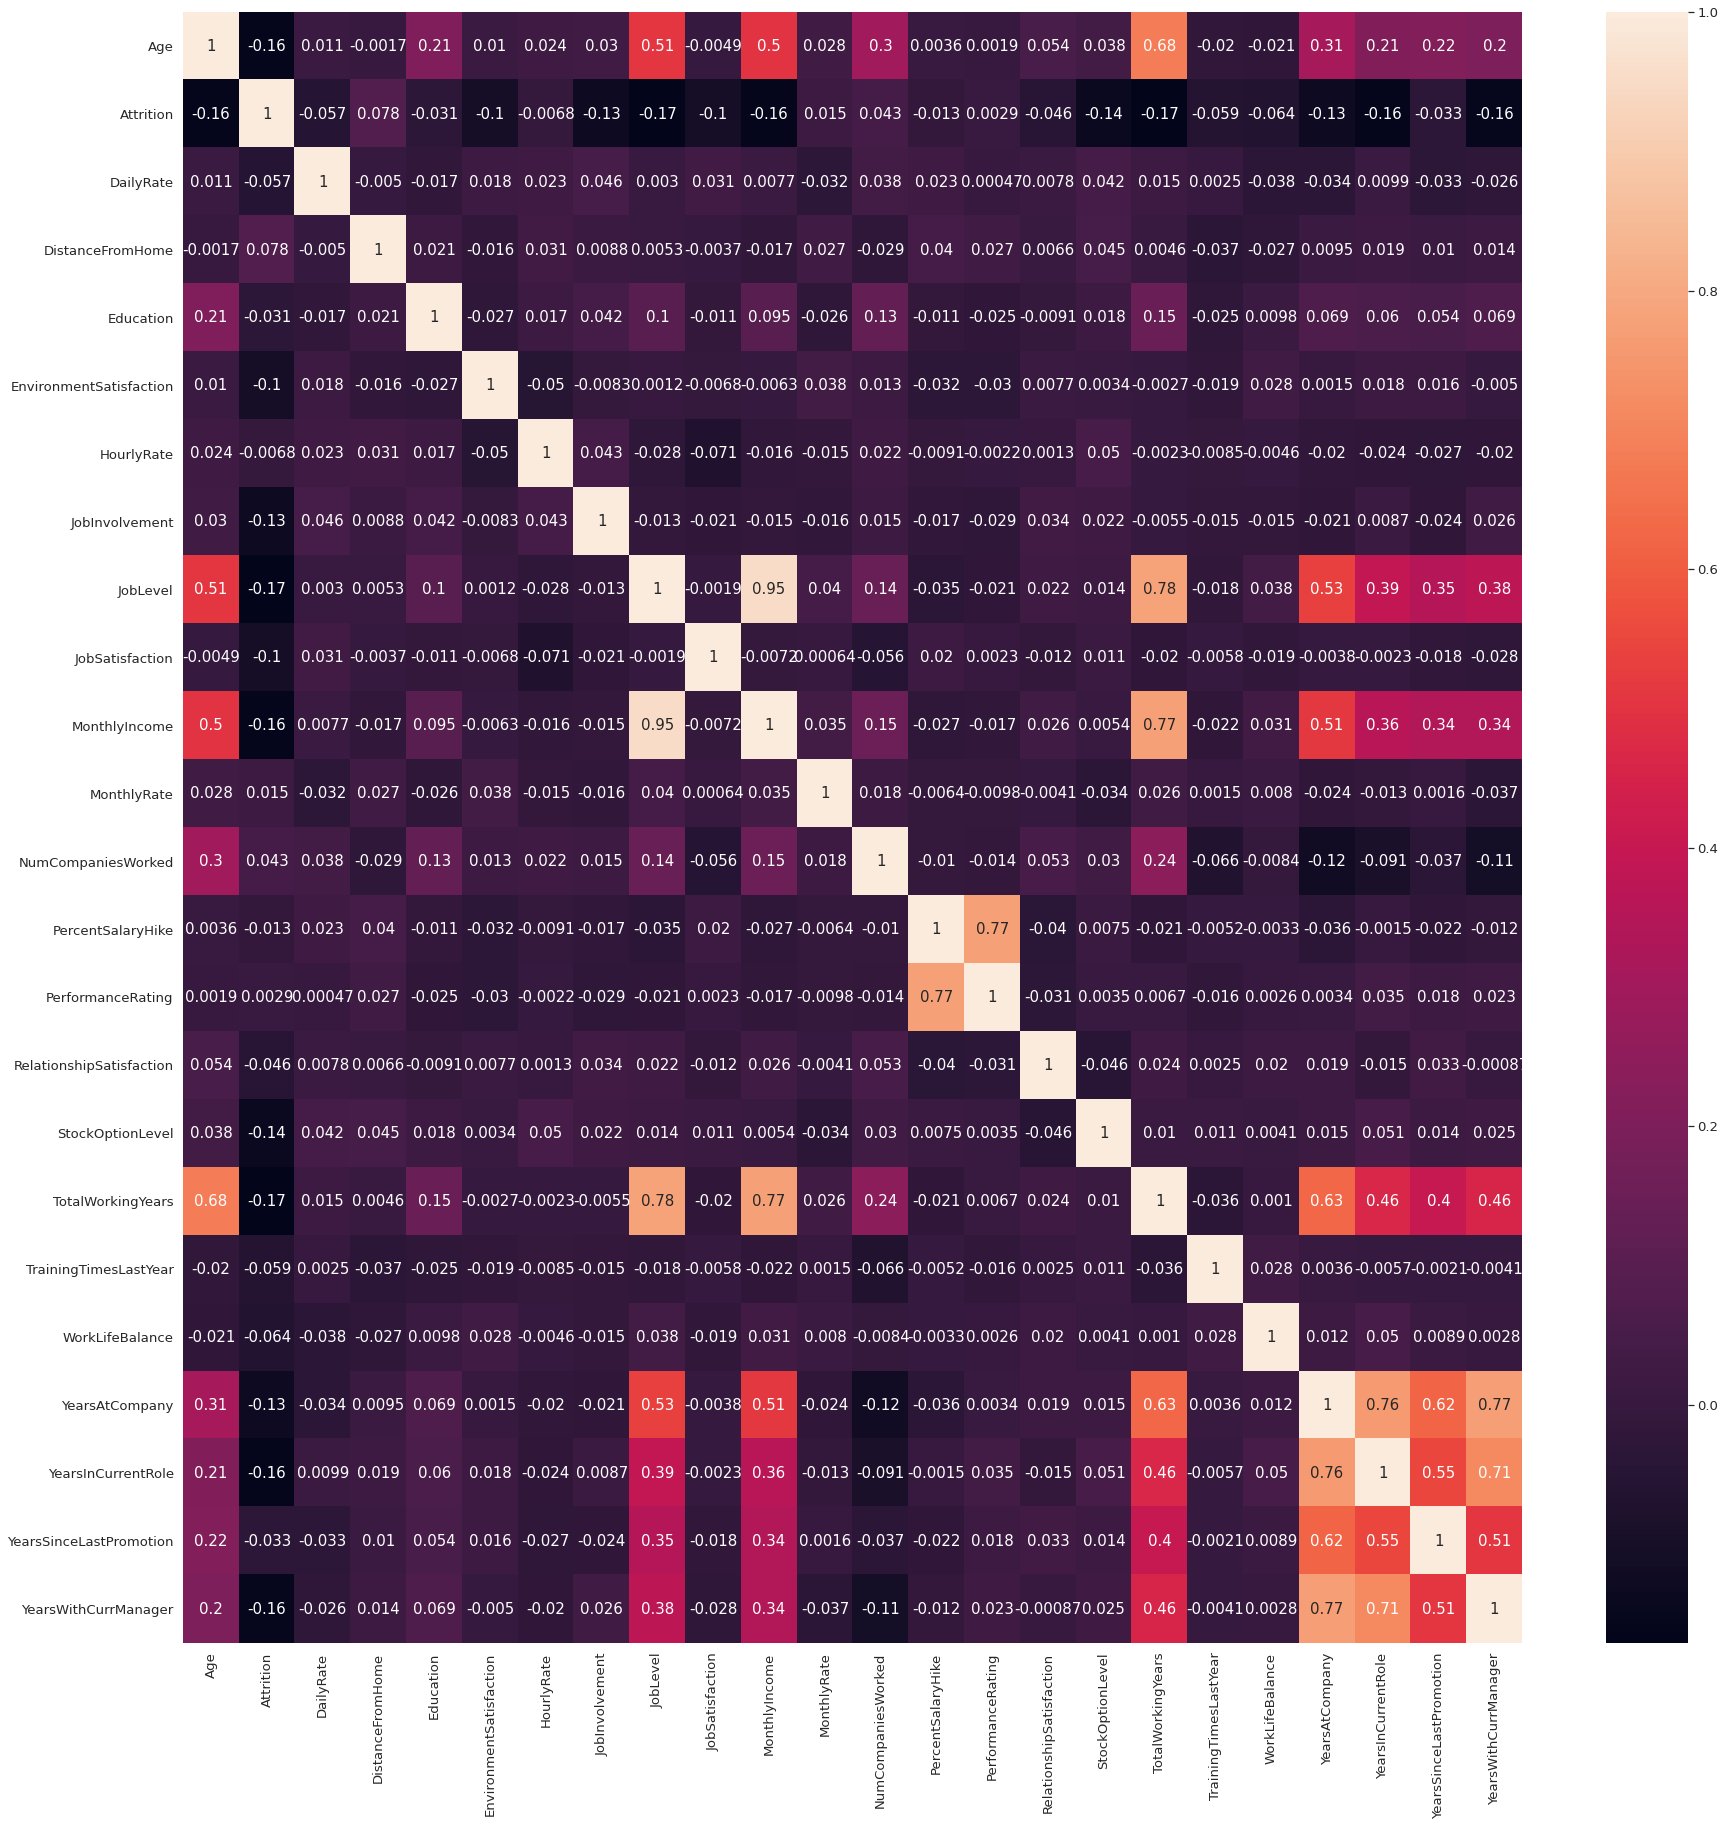

In [91]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, annot_kws={"size":15})

In [0]:
categorical_col.remove('Attrition')

IT IS DONE AS ATTRITION IS OUR LABEL

In [0]:


label = LabelEncoder()
for column in categorical_col:
    data[column] = label.fit_transform(data[column])

In [0]:
features= data.drop('Attrition', axis=1)
label= data.Attrition

In [105]:
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(features,label,test_size=0.20)
trcheck=features_train.head()
print(trcheck)
print(features_train.shape)
                                                        
                                                        

      Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
1229   40               2        369           1                 8          2   
1124   39               2       1462           2                 6          3   
467    37               0        142           2                 9          4   
424    57               2        210           2                29          3   
1368   34               1        735           1                22          4   

      EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
1229               1                        2       0          92   
1124               3                        4       1          38   
467                3                        1       1          69   
424                2                        1       1          56   
1368               4                        3       1          86   

      JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
1229               3   

In [122]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(features_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [0]:
import warnings
warnings.filterwarnings('ignore')
seed = 0   
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [152]:
rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
rf_predictions = rf.predict(features_test)


In [156]:
print("Accuracy score: {}".format(accuracy_score(label_test, rf_predictions)))
print("="*80)
print(classification_report(label_test, rf_predictions))

Accuracy score: 0.8469387755102041
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       251
           1       0.48      0.49      0.48        43

    accuracy                           0.85       294
   macro avg       0.69      0.70      0.70       294
weighted avg       0.85      0.85      0.85       294



IMPORTANCE OF FEATURES


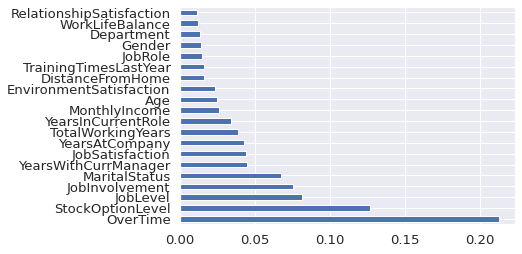

In [157]:
feat_importances = pd.Series(rf.feature_importances_, index=features.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

In [141]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(smote_train, smote_target)
print("Fitting of decision treefinished")

Fitting of decision treefinished


In [142]:
dt_predictions = dt.predict(features_test)
print("Predictions finished")

Predictions finished


In [143]:
print("Accuracy score: {}".format(accuracy_score(label_test, dt_predictions)))
print("CLASSIFICATION REPORT")
print(classification_report(label_test, dt_predictions))

Accuracy score: 0.7551020408163265
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       251
           1       0.24      0.30      0.27        43

    accuracy                           0.76       294
   macro avg       0.56      0.57      0.56       294
weighted avg       0.78      0.76      0.77       294



Feature importance


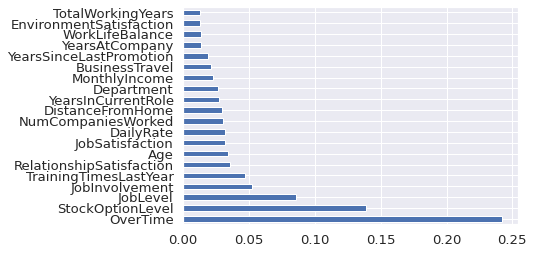

In [145]:
print("Feature importance")
feat_importances = pd.Series(dt.feature_importances_, index=features.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

In [0]:
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [0]:
gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb.predict(features_test)

In [138]:
print(accuracy_score(label_test, gb_predictions))
print("="*80)
print(classification_report(label_test, gb_predictions))

0.8945578231292517
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       251
           1       0.80      0.37      0.51        43

    accuracy                           0.89       294
   macro avg       0.85      0.68      0.72       294
weighted avg       0.89      0.89      0.88       294



FEATURE IMPORTANCE

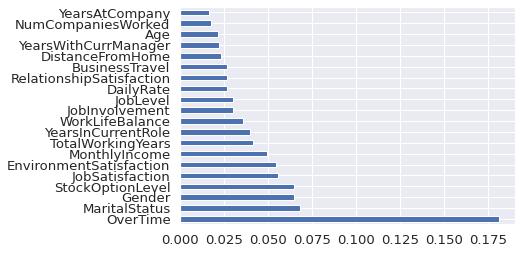

In [146]:
feat_importances = pd.Series(gb.feature_importances_, index=features.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

AcCURACIES OBTAINED:
RANDOM FOREST:84.6
DECISION TREE:75.5
GRADIENT BOOSTING:89.4

Basically the difference between rando forest and decision tree is that in,decision tree the prediction is based on just 1 tree with all features.However,in random forest,multiple trees are generated by nottaking all the features in every decision tree.Therefore,we obtain high accuracy with random forest than decision tree.Random forest has low bias and variance. 